### Description
- This script demonstrates how use the APRP method to compute TOA SW radiation anomalies due to individual components. We do this for the difference between piClim-aer and piClim-control RFMIP experiments for the ACCESS-CM2 model.

### Input
- Total cloud cover and SW radiative fluxes at TOA and SFC for clear- and all-sky conditions
    - standard CMIP nomenclature: clt,rsdt,rsut,rsutcs,rsds,rsus,rsdscs,rsuscs
    - flag to do forward, backward, or avg of forward / backward calcuations (the default)

### Output
- TOA SW anomalies due to changes in:
    - surface albedo (for all-, clear-, and overcast-sky conditions)
    - clouds (total change and contributions from changing cloud cover, scattering, and absorption)
    - non-cloud atmosphere (e.g., from changes in water vapor, aerosols, ozone)

- Equation numbers throughout refer to Taylor et al. (2007)   

### History
- This code is updated from demonstrate_APRP.py  (Jan 2023):
  - all calls to CDAT and Basemap replaced with xarray, xcdat, and cartopy
  - cleans up a variety of other bad coding practices
  - adds the option of doing forward, backward, or (default) the avg of both calculations    

### References
- Taylor, K. E. et al. (2007), Estimating shortwave radiative forcing and response in 
    climate models, J. Clim., 20(11), 2530-2543, doi:10.1175/JCLI4143.1.  
- Zelinka, M. D., T. Andrews, P. M. Forster, and K. E. Taylor, 2014: Quantifying Components of 
    Aerosol-Cloud-Radiation Interactions in Climate Models, J. Geophys. Res., 119, 7599-7615, doi:10.1002/2014JD021710.
- Smith, C. J., et al., 2020: Effective radiative forcing and adjustments in CMIP6 models, 
    Atmos. Chem. Phys., 20, 9591–9618, doi:10.5194/acp-20-9591-2020.
- Zelinka, M. D., C. J. Smith, Y. Qin, and K. E. Taylor, 2023: Comparison of Methods to 
    Estimate Aerosol Effective Radiative Forcings in CMIP Models, Atmos. Chem. Phys., in press. 
    
### Contact
- Mark Zelinka (zelinka1@llnl.gov)

In [1]:
#IMPORT STUFF:
#=====================
import xcdat as xc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from aprp import APRP

/home/precious/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Read in data from control and perturbed experiments; store in dictionary

In [2]:
# Define your variables and experiments
variables = ['clt', 'rsdt', 'rsut', 'rsutcs', 'rsds', 'rsus', 'rsdscs', 'rsuscs']
exps = ['piClim-control', 'piClim-2xdust']

DATA = {}

for exp in exps:
    DATA[exp] = {}
    for var in variables:
        # Construct filename pattern based on your new naming convention
        # Using '*' in case there are multiple time-split files
        fname_pattern = f"{var}_Amon_GFDL-ESM4_{exp}_r1i1p1f1_gr1_000101-003012*.nc"
        
        # Open the dataset(s) matching this pattern
        ds = xc.open_mfdataset(fname_pattern)
        
        # Compute climatological annual cycle for the variable
        # "weighted=True" will perform a time-weighted mean if appropriate
        climo = ds.temporal.climatology(var, 'month', weighted=True)
        
        # Store the resulting climatology in the dictionary
        DATA[exp][var] = climo[var]

In [3]:
DATA

{'piClim-control': {'clt': <xarray.DataArray 'clt' (time: 12, lat: 180, lon: 288)> Size: 5MB
  dask.array<truediv, shape=(12, 180, 288), dtype=float64, chunksize=(1, 180, 288), chunktype=numpy.ndarray>
  Coordinates:
    * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    * lon      (lon) float64 2kB 0.625 1.875 3.125 4.375 ... 356.9 358.1 359.4
    * time     (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  Attributes:
      long_name:      Total Cloud Fraction
      units:          %
      cell_methods:   area: time: mean
      cell_measures:  area: areacella
      standard_name:  cloud_area_fraction
      interp_method:  conserve_order1
      original_name:  clt
      operation:      temporal_avg
      mode:           climatology
      freq:           month
      weighted:       True,
  'rsdt': <xarray.DataArray 'rsdt' (time: 12, lat: 180, lon: 288)> Size: 5MB
  dask.array<truediv, shape=(12, 180, 288), dtype=float64, chunksize=(1, 180, 28

## Run APRP function

In [4]:
from aprp import APRP
output = APRP(DATA['piClim-control'],DATA['piClim-2xdust'])

In [5]:
output

<xarray.Dataset> Size: 60MB
Dimensions:       (time: 12, lat: 180, lon: 288)
Coordinates:
  * time          (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
  * lat           (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon           (lon) float64 2kB 0.625 1.875 3.125 ... 356.9 358.1 359.4
Data variables:
    sfc_alb       (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    sfc_alb_clr   (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    sfc_alb_oc    (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    cld           (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    cld_amt       (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    cld_scat      (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    cld_abs       (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    noncld        (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    noncld_scat   (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    noncld_abs    (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    sfc_alb_ghan  (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>
    cld_ghan      (time, lat, lon) float64 5MB dask.array<chunksize=(1, 180, 288), meta=np.ndarray>

In [6]:
output.to_netcdf('ERF.nc')

/home/precious/anaconda3/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


## Plot maps of APRP components

/home/precious/anaconda3/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/precious/anaconda3/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/precious/anaconda3/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/precious/anaconda3/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/precious/anaconda3/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/precious/anaconda3/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid valu

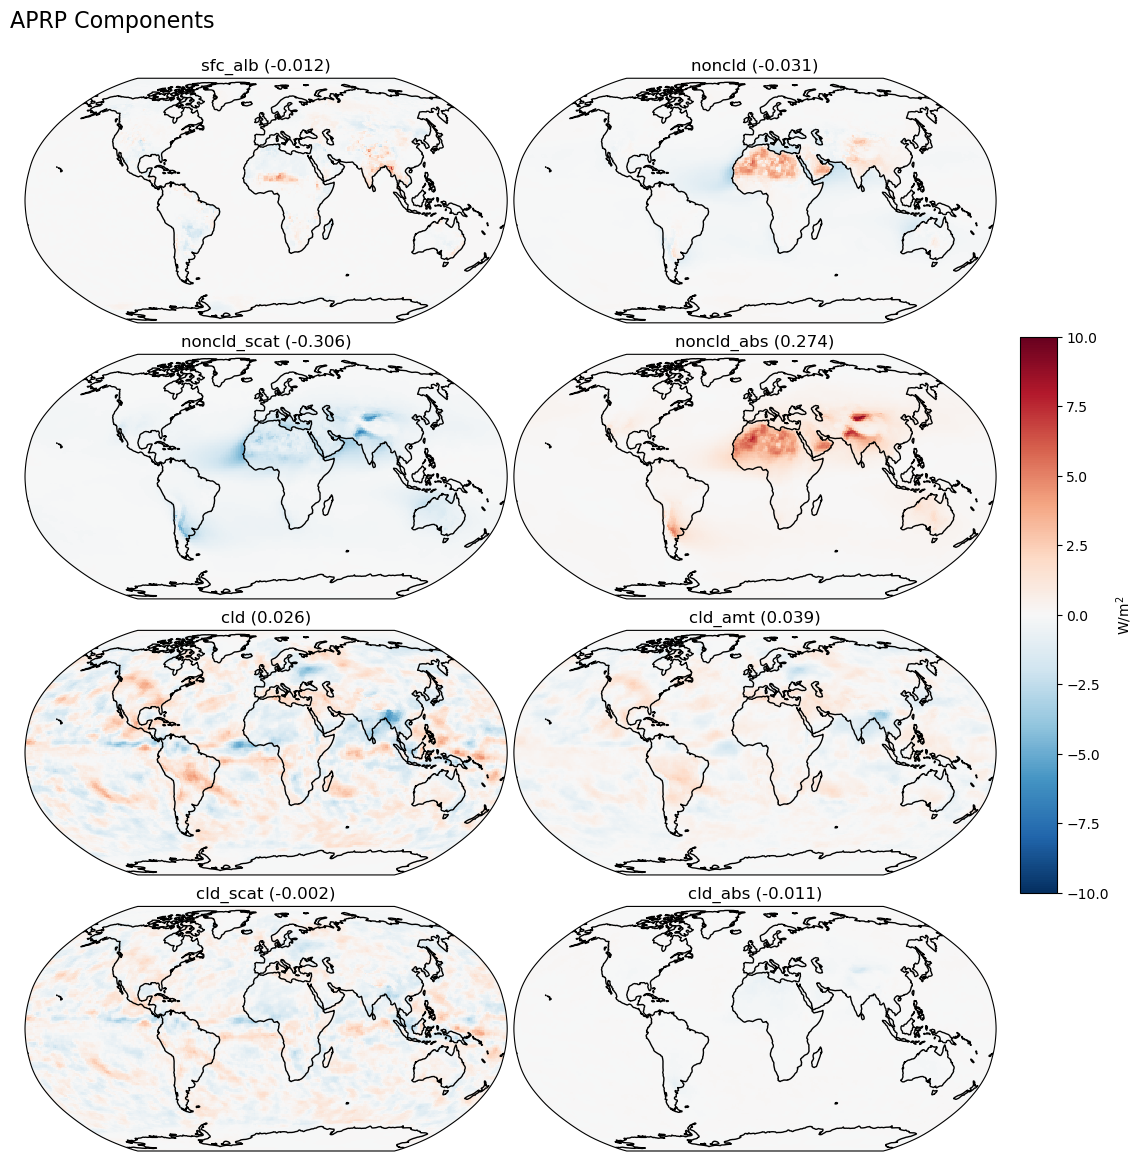

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Example fields (variables) that you want to plot
fields = ['sfc_alb', 'noncld', 'noncld_scat', 'noncld_abs',
          'cld', 'cld_amt', 'cld_scat', 'cld_abs']

#------------------------------------------------------------------
# 1) Open Your Dataset (Adjust Paths/Patterns)
#    If you have multiple files, you can use open_mfdataset 
#    with wildcards. Make sure to specify combine='by_coords'
#    if needed.
#------------------------------------------------------------------

#------------------------------------------------------------------
# 2) Create a Figure and Subplots Using Robinson Projection
#------------------------------------------------------------------
fig = plt.figure(figsize=(12, 12))
plt.suptitle('APRP Components', fontsize=16, x=0, ha='left')

# 4 rows, 2 columns; each axes uses Robinson projection
axes = fig.subplots(nrows=4, ncols=2, subplot_kw={'projection': ccrs.Robinson()})

#------------------------------------------------------------------
# 3) Loop Over the Fields and Plot
#------------------------------------------------------------------
cnt = -1
for row in range(4):
    for col in range(2):
        cnt += 1
        var = fields[cnt]
        
        #----------------------------------------------------------
        # 3A) Temporal averaging (unweighted)
        #     If your data dimension is named 'time', you can do:
        #        avgmap = output[var].mean(dim='time')
        #
        #     For a weighted monthly approach, see the Weighted 
        #     Temporal Mean section below.
        #----------------------------------------------------------
        avgmap = output[var].mean(dim="time")
        
        #----------------------------------------------------------
        # 3B) Spatial averaging (unweighted)
        #     Replace 'lat'/'lon' with 'X'/'Y' or your dataset’s
        #     spatial coordinates as needed.
        #----------------------------------------------------------
        # Example: if your coordinates are lat/lon:
        # avg = avgmap.mean(dim=["lat", "lon"]).values
        #
        # If your dataset uses 'X', 'Y':
        # avg = avgmap.mean(dim=["X", "Y"]).values
        #----------------------------------------------------------
        # Adjust to match the actual names of your coordinate dims:
        avg = avgmap.mean(dim=["lat", "lon"]).values
        
        #----------------------------------------------------------
        # 3C) Plot the Data on the Robinson Projection
        #     'transform=ccrs.PlateCarree()' indicates the data 
        #     is in lat/lon coordinates, so Cartopy can project it.
        #----------------------------------------------------------
        pl = avgmap.plot(
            ax=axes[row, col],
            transform=ccrs.PlateCarree(),  # data is lat-lon
            vmin=-10, vmax=10,
            cmap='RdBu_r',
            add_colorbar=False
        )
        
        # Title shows variable name + numeric mean
        axes[row, col].set_title(f"{var} ({np.round(avg, 3)})")
        axes[row, col].coastlines()

#------------------------------------------------------------------
# 4) Adjust Layout & Add a Shared Colorbar
#------------------------------------------------------------------
plt.tight_layout(w_pad=2.5, h_pad=-2)
fig.colorbar(pl, ax=axes.ravel().tolist(),
             pad=0.02, shrink=0.5, aspect=15, label="W/m$^2$")

plt.savefig("aprp_components.png", dpi=300, bbox_inches="tight")

plt.show()


## Verify that the sum of APRP terms reproduces the actual change in net (down minus up) SW radiation at the TOA


KeyError: "No variable named 'time_bnds'. Variables on the dataset include ['sfc_alb', 'sfc_alb_clr', 'sfc_alb_oc', 'cld', 'cld_amt', ..., 'lat', 'lon', 'drsnt', 'sum', 'resid']"

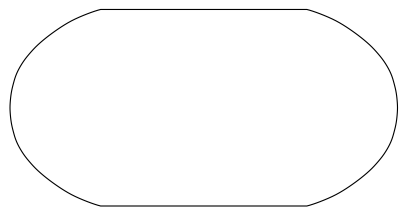

In [10]:
output['drsnt'] = (DATA['piClim-2xdust']['rsdt']-DATA['piClim-2xdust']['rsut']) - \
              (DATA['piClim-control']['rsdt']-DATA['piClim-control']['rsut'])
output['sum'] = output['sfc_alb']+output['noncld']+output['cld']
output['resid'] = output['sum'] - output['drsnt']
fields = ['sum','drsnt','resid']
cnt=-1
for row in range(3):
    cnt+=1
    fig = plt.figure(figsize=(5,5))
    axes = fig.subplots(subplot_kw={'projection': ccrs.Robinson()})
    var = fields[cnt]
    avgmap = output.temporal.average(var, weighted=True)
    #avgmap = avgmap.bounds.add_missing_bounds()
    avg = avgmap.spatial.average(var, axis=["X", "Y"])[var].values
    if var=='resid':
        mn,mx = -.01,.01
    else:
        mn,mx = -10,10
    pl = avgmap[var].plot(ax = axes, 
              transform=ccrs.PlateCarree(),
              vmin = mn, vmax = mx, 
              cmap = 'RdBu_r', 
              add_colorbar=False)
    axes.set_title(var+" (" + f'{avg:.4f}' + ")")
    axes.coastlines()
    plt.tight_layout(w_pad=2.5,h_pad=-2)        
    fig.colorbar(pl, ax=axes, extend='both',orientation='horizontal',pad = 0.02, aspect = 50, label="W/m$^2$")
        

## Compare to Chris Smith's implementation

In [ ]:
# Chris's code needs these to be numpy arrays:
base={}
pert={}
for var in list(DATA['piClim-aer'].keys()):
    pert[var] = DATA['piClim-aer'][var].to_numpy()
    base[var] = DATA['piClim-control'][var].to_numpy()

In [ ]:
# from smith_aprp_v2 import aprp
from smith_aprp import aprp
smith  = aprp(base, pert, longwave=False)
smith['sfc_alb'] = smith['t1'] + smith['t4']
smith['noncld_scat'] = smith['t2'] + smith['t5']
smith['noncld_abs'] = smith['t3'] + smith['t6']
smith['cld_amt'] = smith['t9']
smith['cld_scat'] = smith['t7']
smith['cld_abs'] = smith['t8']
smith['cld'] = smith['cld_amt'] + smith['cld_scat'] + smith['cld_abs']
smith['noncld'] = smith['noncld_scat'] + smith['noncld_abs']

In [ ]:
# Convert these back into an xarray dataset:
TIME = output.time
LAT = output.lat
LON = output.lon
DS = xr.Dataset(
{
    'sfc_alb':(('time','lat','lon'),smith['sfc_alb'].data),
    'cld':(('time','lat','lon'),smith['cld'].data),
    'cld_amt':(('time','lat','lon'),smith['cld_amt'].data),
    'cld_scat':(('time','lat','lon'),smith['cld_scat'].data),
    'cld_abs':(('time','lat','lon'),smith['cld_abs'].data),
    'noncld':(('time','lat','lon'),smith['noncld'].data),
    'noncld_scat':(('time','lat','lon'),smith['noncld_scat'].data),
    'noncld_abs':(('time','lat','lon'),smith['noncld_abs'].data),
},
coords={'time': TIME,'lat': LAT,'lon': LON},
) 
DS.lat.attrs["axis"] = "Y"
DS.lon.attrs["axis"] = "X"
SMITH = DS.bounds.add_missing_bounds()

In [ ]:
# Make figures showing the APRP components
fields = ['sfc_alb','noncld','noncld_scat','noncld_abs','cld','cld_amt','cld_scat','cld_abs']
fig = plt.figure(figsize = (12,12))
plt.suptitle('Chris Smith APRP Implementation',fontsize=16,x=0,ha='left')
axes = fig.subplots(nrows=4, ncols=2, subplot_kw={'projection': ccrs.Robinson()})
cnt=-1
for row in range(4):
    for col in range(2):
        cnt+=1
        var = fields[cnt]
        avgmap = SMITH.temporal.average(var, weighted=True)#[var]
        avg = avgmap.spatial.average(var, axis=["X", "Y"])[var].values
        pl = avgmap[var].plot(ax = axes[row,col], 
                  transform=ccrs.PlateCarree(),
                  vmin = -10, vmax =  10, 
                  cmap = 'RdBu_r', 
                  add_colorbar=False)
        axes[row,col].set_title(var+" (" + str(np.round(avg,3)) + ")")
        axes[row,col].coastlines()
plt.tight_layout(w_pad=2.5,h_pad=-2)        
fig.colorbar(pl, ax=axes.ravel().tolist(), pad = 0.02, shrink = 0.5, aspect = 15, label="W/m$^2$")

In [ ]:
# Check if Smith's sum reproduces the true SW TOA radiation change:
SMITH['drsnt'] = (DATA['piClim-aer']['rsdt']-DATA['piClim-aer']['rsut']) - \
              (DATA['piClim-control']['rsdt']-DATA['piClim-control']['rsut'])
SMITH['sum'] = SMITH['sfc_alb']+SMITH['noncld']+SMITH['cld']
SMITH['resid'] = SMITH['sum'] - SMITH['drsnt']
fields = ['sum','drsnt','resid']
cnt=-1
for row in range(3):
    cnt+=1
    fig = plt.figure(figsize=(5,5))
    axes = fig.subplots(subplot_kw={'projection': ccrs.Robinson()})
    var = fields[cnt]
    avgmap = SMITH.temporal.average(var, weighted=True)
    avgmap = avgmap.bounds.add_missing_bounds()
    avg = avgmap.spatial.average(var, axis=["X", "Y"])[var].values
    if var=='resid':
        mn,mx = -1,1
    else:
        mn,mx = -10,10
    pl = avgmap[var].plot(ax = axes, 
              transform=ccrs.PlateCarree(),
              vmin = mn, vmax = mx, 
              cmap = 'RdBu_r', 
              add_colorbar=False)
   
    axes.set_title(var+" (" + f'{avg:.4f}' + ")")
    axes.coastlines()
    plt.tight_layout(w_pad=2.5,h_pad=-2)        
    fig.colorbar(pl, ax=axes, extend='both',orientation='horizontal',pad = 0.02, aspect = 50, label="W/m$^2$")
        